## *Лабораторная работа № 1*
### *«Проверка гипотезы о законе распределения генеральной совокупности»*
В результате опыта была получена выборочная совокупность.

Задание:
1) Составить вариационный ряд.
2) Построить интервальный статистический ряд.
3) По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот,
4) Построить график эмпирической функции распределения.
5) Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
6) По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
7) Найти оценки параметров предполагаемого распределения генеральной совокупности.
8) Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
9) Проверить выполнение правила «трех сигма».
10) Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
11) Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

#### Вариант 14
18,5; 19,0; 20,6; 18,4; 18,3; 19,2 18,5; 20,3; 18,6; 20,6; 18,5; 18,3; 19,1; 21,0; 18,6; 19,1; 18,4; 19,9; 18,7; 19,5; 18,4; 21,6; 18,9; 19,5; 20,1; 19,4; 19,0; 19,2; 19,7; 19,9; 19,5; 20,0; 18,4; 18,3; 19,6; 18,8; 23,1; 19,6; 18,5; 20,7; 18,7; 18,7; 22,8; 18,9; 20,2; 19,0; 19,2; 19,6; 18,9; 20,3; 21,0; 18,9; 20,3; 18,3; 19,5; 18,5;18,5; 18,6; 19,3; 18,6.

# 1. Составить вариационный ряд

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = [18.5, 19.0, 20.6, 18.4, 18.3, 19.2, 18.5, 20.3, 18.6, 20.6, 18.5, 18.3, 19.1, 21.0, 18.6, 19.1, 18.4, 19.9, 18.7, 19.5, 18.4, 21.6, 18.9, 19.5, 20.1, 19.4, 19.0, 19.2, 19.7, 19.9, 19.5, 20.0, 18.4, 18.3, 19.6, 18.8, 23.1, 19.6, 18.5, 20.7, 18.7, 18.7, 22.8, 18.9, 20.2, 19.0, 19.2, 19.6, 18.9, 20.3, 21.0, 18.9, 20.3, 18.3, 19.5, 18.5, 18.5, 18.6, 19.3, 18.6]
print(f"Начальная выборка: {data}")

Начальная выборка: [18.5, 19.0, 20.6, 18.4, 18.3, 19.2, 18.5, 20.3, 18.6, 20.6, 18.5, 18.3, 19.1, 21.0, 18.6, 19.1, 18.4, 19.9, 18.7, 19.5, 18.4, 21.6, 18.9, 19.5, 20.1, 19.4, 19.0, 19.2, 19.7, 19.9, 19.5, 20.0, 18.4, 18.3, 19.6, 18.8, 23.1, 19.6, 18.5, 20.7, 18.7, 18.7, 22.8, 18.9, 20.2, 19.0, 19.2, 19.6, 18.9, 20.3, 21.0, 18.9, 20.3, 18.3, 19.5, 18.5, 18.5, 18.6, 19.3, 18.6]


In [ ]:
variation_series = sorted(data)
print(f"Вариационный ряд: {variation_series}")

Вариационный ряд: [18.3, 18.3, 18.3, 18.3, 18.4, 18.4, 18.4, 18.4, 18.5, 18.5, 18.5, 18.5, 18.5, 18.5, 18.6, 18.6, 18.6, 18.6, 18.7, 18.7, 18.7, 18.8, 18.9, 18.9, 18.9, 18.9, 19.0, 19.0, 19.0, 19.1, 19.1, 19.2, 19.2, 19.2, 19.3, 19.4, 19.5, 19.5, 19.5, 19.5, 19.6, 19.6, 19.6, 19.7, 19.9, 19.9, 20.0, 20.1, 20.2, 20.3, 20.3, 20.3, 20.6, 20.6, 20.7, 21.0, 21.0, 21.6, 22.8, 23.1]



Интервальный статистический ряд:
    Интервал  Частота
0  18.3-19.1       29
1  19.1-19.9       17
2  19.9-20.7        9
3  20.7-21.5        2
4  21.5-22.3        1
5  22.3-23.1        2


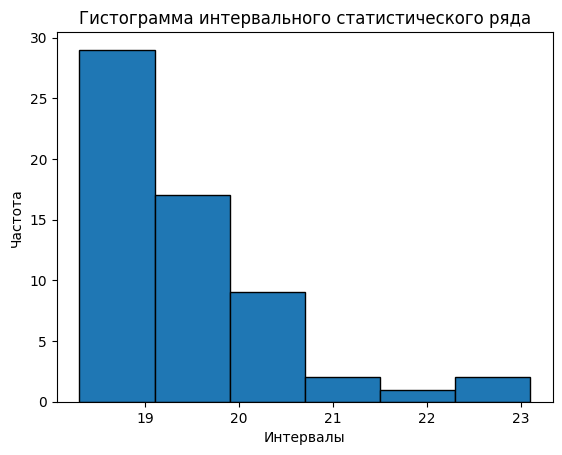

In [10]:
n = len(data)
k = int(1 + 3.322 * np.log10(n))

# Создаем интервалы
hist, bin_edges = np.histogram(data, bins=k)

# Создаем DataFrame для интервального ряда
interval_series = pd.DataFrame({
    'Интервал': [f"{bin_edges[i]:.1f}-{bin_edges[i+1]:.1f}" for i in range(len(bin_edges)-1)],
    'Частота': hist
})

print("\nИнтервальный статистический ряд:")
print(interval_series)

# Построение гистограммы
plt.hist(data, bins=bin_edges, edgecolor='black')
plt.title('Гистограмма интервального статистического ряда')
plt.xlabel('Интервалы')
plt.ylabel('Частота')
plt.show()